# Question 2

## Problem 3

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
from scipy import stats

In [2]:
N = 100
l = L = 1000
S = 217575
vmin = (0.5 + 0.02*(S%21))
vmax = (3 + 0.2*(S%11))
Ts =  86400

#### Assumptions 
Apply the same configurations as done in the book in example 6.5. Meaning that we use the stochastic recurrence.

In [3]:
def simulate_waypoint():

    x,y = random.randint(0,l+1), random.randint(0,L+1)
    v0 = random.uniform(vmin, vmax)

    m_init = np.array([x,y])
    v_init = v0
    t = 0
    
    M = [m_init]
    V = [v_init]
    T = [t]
    
    while(t < Ts):

        x,y = random.randint(0,l+1), random.randint(0,L+1)
        m = np.array([x,y])

        t = T[-1] + np.linalg.norm(m-M[-1])/V[-1]

        v = random.uniform(vmin, vmax)
        
        M.append(m)
        V.append(v)
        T.append(t)
 
    return np.array(M), np.array(V), np.array(T)

Retrieve all positions, times, and velocities of all users:

In [4]:
start = time.time()
M_users = []
V_users = []
T_users = []
for i in range(N):
    M, V, T = simulate_waypoint()
    M_users.append(M)
    V_users.append(V)
    T_users.append(T)
end = time.time()
print('Our program takes {:.2f} seconds to generate 1 day of data for N={} users.'.format(end-start, N))

Our program takes 0.47 seconds to generate 1 day of data for N=100 users.


In [5]:
# we comment the line below to always work with the same data for the following plots, uncomment and run
# all cells to generate new data
#np.save('MVT_data', np.array([M_users, V_users, T_users]))

In [6]:
M_users, V_users, T_users = np.load('MVT_data.npy')

In [7]:
len_waypoints = [len(waypoints) for waypoints in M_users]
print('Mean number of waypoints: {}.'.format(np.mean(len_waypoints)))
print('Minimum number of waypoints: {}.'.format(np.min(len_waypoints)))
print('Maximum number of waypoints: {}.'.format(np.max(len_waypoints)))

Mean number of waypoints: 341.64.
Minimum number of waypoints: 304.
Maximum number of waypoints: 386.


Corresponding boxplot:

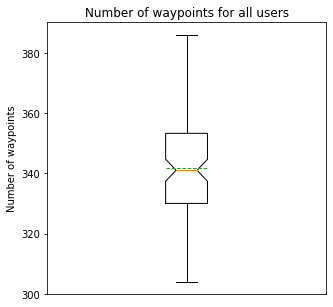

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.boxplot(len_waypoints, notch=True, showmeans=True, meanline=True)
ax.get_xaxis().set_visible(False)
ax.set_title('Number of waypoints for all users')
ax.set_ylabel('Number of waypoints')
plt.savefig('q2_boxplot.png', dpi=300)

Course and waypoints for 1 and 8 users:

In [9]:
def plot_course(num_users, name, threshold=None):
    fig, axes = plt.subplots(2, 1, figsize=(10,10))

    user_id = 0
    pos_i = M_users[user_id]
    if threshold is not None:
        num_waypoints = threshold
    else:
        num_waypoints = len(pos_i)
    color = num_waypoints*['white']
    color[0] = 'black'

    
    for i in range(num_users):
        pos_i = M_users[i]
        if threshold is not None:
            num_waypoints = threshold
        else:
            num_waypoints = len(pos_i)
        color = num_waypoints*['white']
        color[0] = 'black'
        x,y = pos_i[:num_waypoints, 0], pos_i[:num_waypoints, 1]
        axes[0].scatter(x,y, c=color, marker='.', alpha=1)
        axes[0].plot(x, y, linewidth=0.5, alpha=0.5)
        
        axes[1].scatter(x,y,marker='.', alpha=0.5)
        
    axes[0].set_ylabel('Y coordinate')
    if num_users == 1:
        axes[0].set_title('Course of {} user'.format(num_users))
    else:
        axes[0].set_title('Course of {} users'.format(num_users))
    
    axes[1].set_xlabel('X coordinate')
    axes[1].set_ylabel('Y coordinate')
    if num_users == 1:
        axes[1].set_title('Waypoints of {} user'.format(num_users))
    else:
        axes[1].set_title('Waypoints of {} users'.format(num_users))
    
    plt.tight_layout()
    plt.savefig(name, dpi=100)
    plt.show()

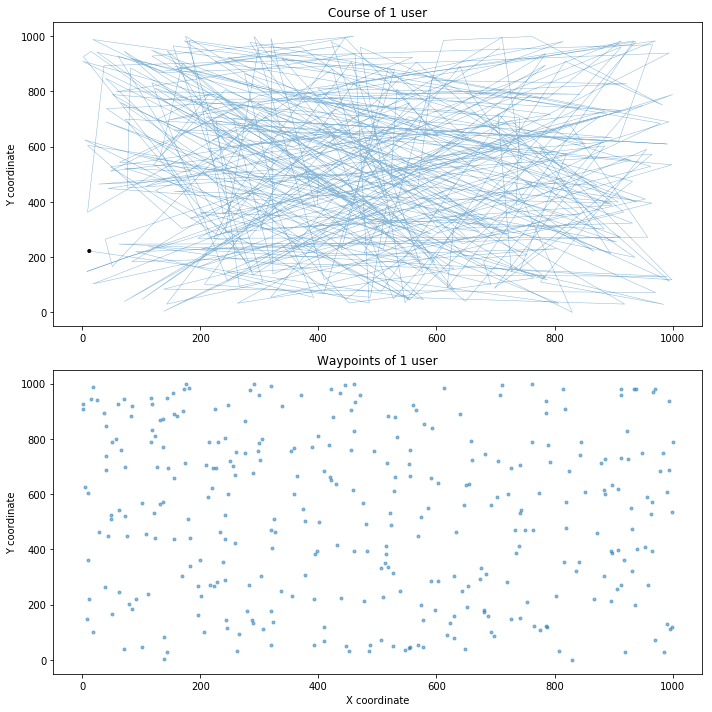

In [10]:
plot_course(1,'q2_courses_1_user.png')

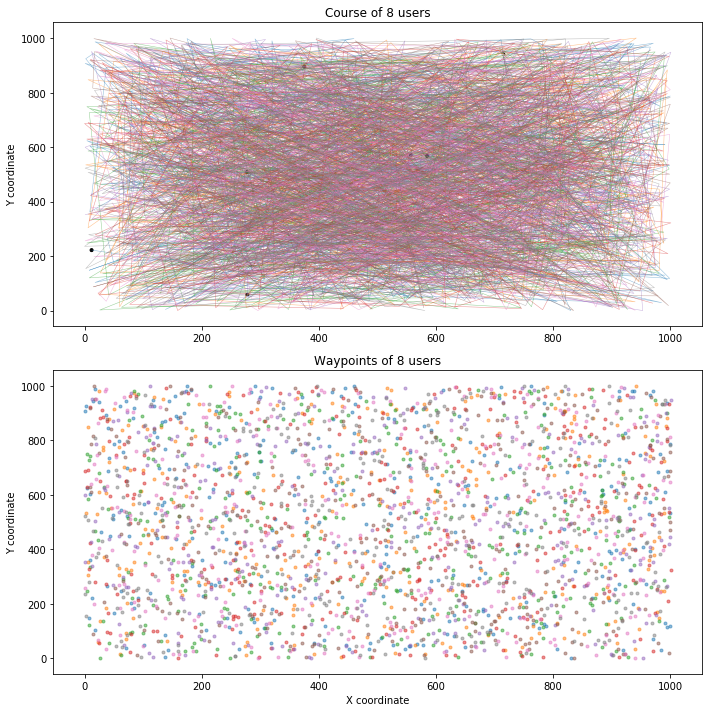

In [11]:
plot_course(8, 'q2_courses_8_users.png')

# Question 3

## Event Average Viewpoint

In [12]:
def plot_average_speed(data, name):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    user_id = 0
    axes[0].hist(data[user_id])
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel('Speed')
    axes[0].set_title('For one user')

    axes[1].hist(np.concatenate(data).ravel().tolist())
    axes[1].set_xlabel('Speed')
    axes[1].set_title('For all users')
    
    plt.tight_layout()
    plt.savefig(name+'.png', dpi=300)
    plt.show()

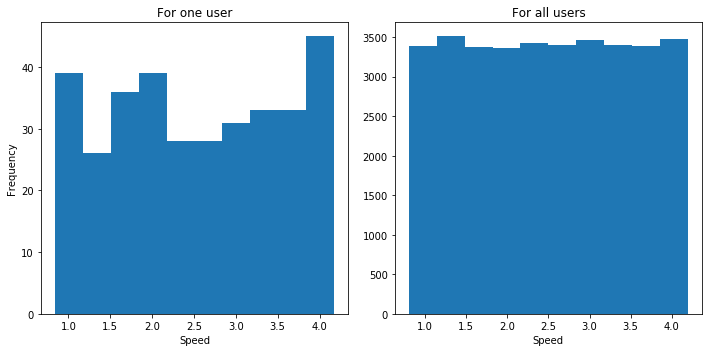

In [13]:
plot_average_speed(V_users, 'q3_event_average_speed')

In [14]:
def plot_average_position(data, name):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    user_id = 0
    one_user = axes[0].hist2d(data[user_id][:,0], data[user_id][:,1], bins=(50,50), cmap=plt.cm.Greys)
    plt.colorbar(one_user[3], ax=axes[0])
    axes[0].set_ylabel('Y coordinate')
    axes[0].set_xlabel('X coordinate')
    axes[0].set_title('For one user')
        
    xs = []
    ys = []
    for i in range(N):
        xs.append(data[i][:,0])
        ys.append(data[i][:,1])
        
    all_users = axes[1].hist2d(np.concatenate(xs).tolist(), np.concatenate(ys).tolist(), bins=(50,50), cmap=plt.cm.Greys)
    plt.colorbar(all_users[3], ax=axes[1])
    axes[1].set_xlabel('X coordinate')
    axes[1].set_title('For all users')
    plt.tight_layout()
    plt.savefig(name+'.png', dpi=300)
    plt.show()

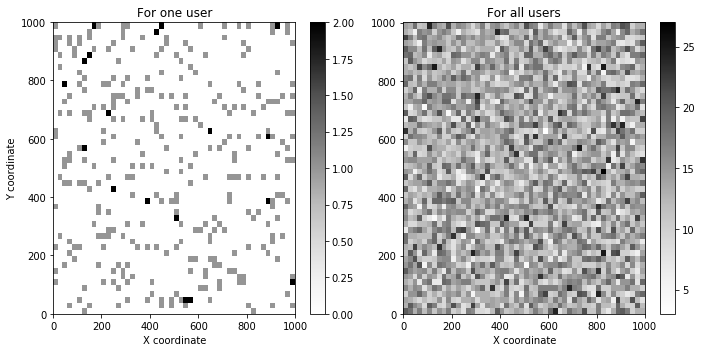

In [15]:
plot_average_position(M_users, 'q3_event_average_position')

## Time Average Viewpoint

The function below converts event based lists into time based lists with sampling frequency of 10 sec by default.

In [16]:
def time_viewpoint_transformation(users_pos_event, users_speed_event, users_time_event, sampling_freq=10):
    sampling_intervals = np.arange(0, Ts, sampling_freq)
    
    M_users_time = []
    V_users_time = []
    T_users_time = []
    for i in range(N):
        T_users_time.append(sampling_intervals)
        index_bins = np.digitize(sampling_intervals, users_time_event[i])-1
        
        users_new_pos_time = []
        for num, index in enumerate(index_bins):
            t_start, pos_start = users_time_event[i][index], users_pos_event[i][index]
            t_end, pos_end = users_time_event[i][index+1], users_pos_event[i][index+1]
            x_dist, y_dist = pos_end[0] - pos_start[0], pos_end[1] - pos_start[1]
            t_dist = t_end - t_start
            coef = (T_users_time[i][num] - t_start)/t_dist
            new_pos = (pos_start[0] + coef*x_dist, pos_start[1] + coef*y_dist)
            users_new_pos_time.append(new_pos)
            
        M_users_time.append(np.array(users_new_pos_time))
        V_users_time.append(np.array([users_speed_event[i][index] for index in index_bins]))
    
    return M_users_time, V_users_time, T_users_time

In [17]:
M_users_time, V_users_time, T_users_time = time_viewpoint_transformation(M_users, V_users, T_users)

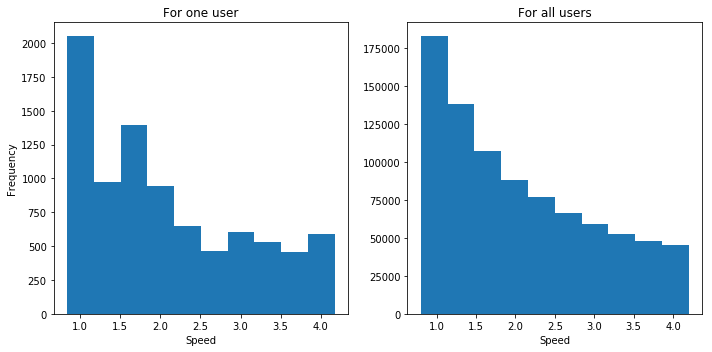

In [18]:
plot_average_speed(V_users_time, 'q3_time_average_speed')

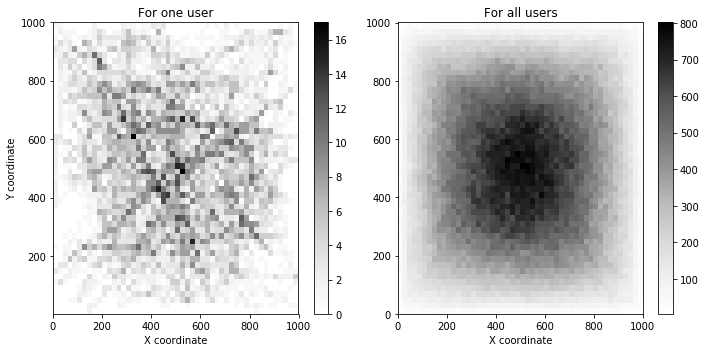

In [19]:
plot_average_position(M_users_time, 'q3_time_average_position')

# Question 4

### 4.1

Code/Method setup 

In [20]:
X_N = np.array([np.mean(v_user) for v_user in V_users])
Y_N = np.array([np.mean(v_user) for v_user in V_users_time])

In [21]:
def assumptions_qq_plot(data, name, title):
    s = stats.probplot(x=data,
                   sparams=(0,1),
                   dist=stats.norm,
                   plot =plt )
    
    plt.title(title)
    plt.savefig(name, dpi=300, bbox_inches='tight')

def calculate_mean_std(data, MLE_std=True):
    n = len(data)
    mean = np.mean(data)
    if MLE_std:
        n -=1
    
    acc = 0
    for value in data:
        res = math.pow((value-mean),2)
        acc += res
    std = math.sqrt(acc/n)
    
    return mean, std

def CI_mean_normal(data, level=0.95):
    n = len(data)
    mean, std = calculate_mean_std(data) 
    U = mean + (stats.t.ppf(level, df=n-1)*std)/math.sqrt(n)
    L = mean - (stats.t.ppf(level, df=n-1)*std)/math.sqrt(n)
    
    return L, U, mean

def CI_median_normal(data):
    n = len(data)
    data_sort = np.sort(data)
    j = 0
    k = 0
    if (n == 30):
        # read from the exam booklet
        j = 10
        k = 21
    elif (n>70):
        j = math.floor(0.5 * n - 0.980 * math.sqrt(n)) - 1
        k = math.ceil(0.5 * n + 1 + 0.980 * math.sqrt(n)) - 1
    else:
        print('Rules are only defined for n=30 and n>70.')
    return data_sort[j], data_sort[k], np.median(data)

def plot_CI(data, x_label, y_label, name):
    fig, ax = plt.subplots(1, 1, figsize=(2,10))
    
    L_mean, U_mean, mean =  CI_mean_normal(data)
    L_median, U_median, median = CI_median_normal(data)

    print("Calculated mean:   {:.5f}".format(mean))
    print("Calculated median: {:.5f}".format(median))
    print("Confidence interval of mean: [{:.5f},{:.5f}]".format(L_mean, U_mean))
    print("Confidence interval of median: [{:.5f},{:.5f}]".format(L_median, U_median)) 
    print("Width size of mean: {:.5f}".format(U_mean - L_mean))
    print("Width size of median: {:.5f}".format(U_median - L_median))
        
    # horizontal lines
    ax.axhline(y=L_mean, linestyle='--', color='b', linewidth=1)
    ax.axhline(y=U_mean, linestyle='--', color='b', linewidth=1)
    ax.axhline(y=L_median, linestyle='--', color='r', linewidth=1)
    ax.axhline(y=U_median, linestyle='--', color='r', linewidth=1)
    
    # vertical lines
    l1 = mlines.Line2D([0.2], [L_mean, U_mean], color='b', linestyle='-', linewidth=1)
    l2 = mlines.Line2D([0.8], [L_median, U_median], color='r', linestyle='-', linewidth=1)
    ax.add_line(l1)
    ax.add_line(l2)
    
    # mean and median markers
    ax.plot([0.2],[mean], marker='o', color='b', markersize=5) 
    ax.plot([0.8],[median], marker= 'o', color='r', markersize=5)
    
    # trick to make nicer plot
    ax.plot([0],[mean], marker='o', alpha=0) 
    ax.plot([1],[median], marker= 'o', alpha=0)

    ax.set_title('CI (N={})'.format(str(len(data))))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(bottom=2, top=2.6)
    plt.xticks([0.2,0.8], ['Mean', 'Median'])
    plt.locator_params(axis='y', nbins=20)
    plt.savefig(name+'.png', dpi=300, bbox_inches='tight')

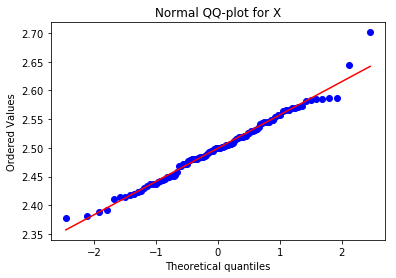

In [22]:
assumptions_qq_plot(X_N, "q4_assumptions_X_N", "Normal QQ-plot for X")

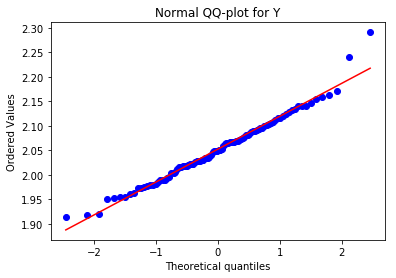

In [23]:
assumptions_qq_plot(Y_N, "q4_assumptions_Y_N", "Normal QQ-plot for Y")

### a)

Calculated mean:   2.49954
Calculated median: 2.49986
Confidence interval of mean: [2.48999,2.50909]
Confidence interval of median: [2.48462,2.51223]
Width size of mean: 0.01910
Width size of median: 0.02761


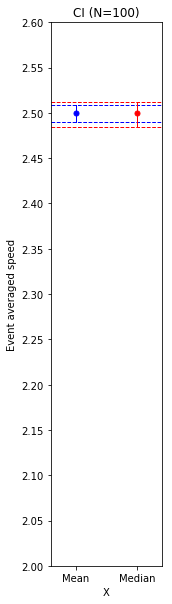

In [24]:
plot_CI(X_N, "X", "Event averaged speed", "q4_X_100_confidence")

Calculated mean:   2.05271
Calculated median: 2.05003
Confidence interval of mean: [2.04163,2.06379]
Confidence interval of median: [2.02989,2.06759]
Width size of mean: 0.02215
Width size of median: 0.03770


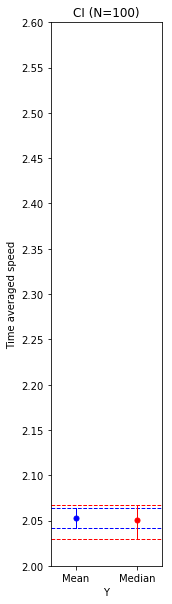

In [25]:
plot_CI(Y_N, "Y", "Time averaged speed", "q4_Y_100_confidence")

###  c)

Calculated mean:   2.50047
Calculated median: 2.49053
Confidence interval of mean: [2.48001,2.52094]
Confidence interval of median: [2.48134,2.54411]
Width size of mean: 0.04093
Width size of median: 0.06277


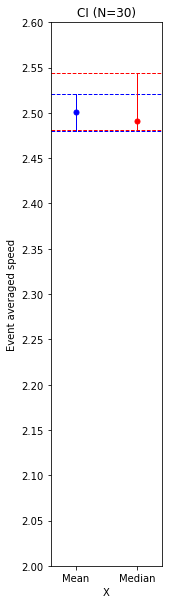

In [26]:
plot_CI(X_N[:30], "X", "Event averaged speed", "q4_X_30_confidence")

Calculated mean:   2.04854
Calculated median: 2.03361
Confidence interval of mean: [2.02523,2.07184]
Confidence interval of median: [2.01740,2.07017]
Width size of mean: 0.04661
Width size of median: 0.05277


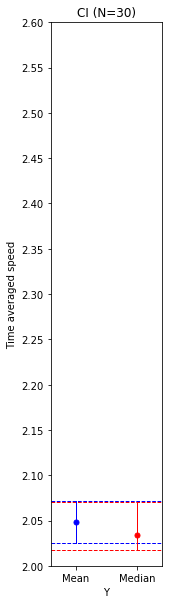

In [27]:
plot_CI(Y_N[:30], "Y","Time averaged speed", "q4_Y_30_confidence")

## Exercise 4.2

In [28]:
def prediction_interval_normal(data, level=0.95):
    alpha = 1-level
    mean, std = calculate_mean_std(data, True)
    L = mean - stats.norm.ppf(1-alpha/2)*std
    U = mean + stats.norm.ppf(1-alpha/2)*std 
    
    return L, U

def prediction_interval_order_statistic(data, level=0.95):  
    alpha = 1-level
    n = len(data)
    j = math.floor((n+1)*alpha/2)
    k = math.ceil((n+1)*(1-alpha/2))
    data_sorted = np.sort(data)
    
    #because in the thereom we start from 1.
    try:
        L, U = data_sorted[j-1], data_sorted[k-1]
    except:
        return None,None
        
    return L, U

def plot_PI(data, name, legend=False):
    fig, ax = plt.subplots(1, 1, figsize=(2,10))
 
    L_normal, U_normal =  prediction_interval_normal(data)
    L_order_statistc, U_order_statistc = prediction_interval_order_statistic(data)

    print("Prediction interval assuming normal distribution: [{:.5f},{:.5f}]".format(L_normal, U_normal))
    print("Width size: {:.5f}".format(U_normal - L_normal))
    if(L_order_statistc is not None):
        print("Prediction interval using ordered statistic: [{:.5f},{:.5f}]".format(L_order_statistc, U_order_statistc))
        print("Width size: {:.5f}".format(U_order_statistc - L_order_statistc))
    else:
        print('No valid prediction interval using the order statistic for N={}.'.format(str(len(data))))

    # horizontal lines
    ax.axhline(y=L_normal, linestyle='--', color='g', linewidth=1, label='normal distribution (assumption)')
    ax.axhline(y=U_normal, linestyle='--', color='g', linewidth=1)
    
    if L_order_statistc is not None:
        ax.axhline(y=L_order_statistc, linestyle='--', color='m', linewidth=1, label='order statistic')
        ax.axhline(y=U_order_statistc, linestyle='--', color='m', linewidth=1)
    
    ax.set_title("PI (N={})".format(str(len(data))))
    ax.xaxis.set_tick_params(length=0)   
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_xlabel('Y')
    ax.set_ylim(bottom=1.8, top=2.3)
    plt.locator_params(axis='y', nbins=10)
    if legend:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.5, 1))
    plt.savefig(name+'.png', dpi=300, bbox_inches = 'tight')

### a)

Prediction interval assuming normal distribution: [1.92196,2.18346]
Width size: 0.26150
Prediction interval using ordered statistic: [1.91808,2.24126]
Width size: 0.32318


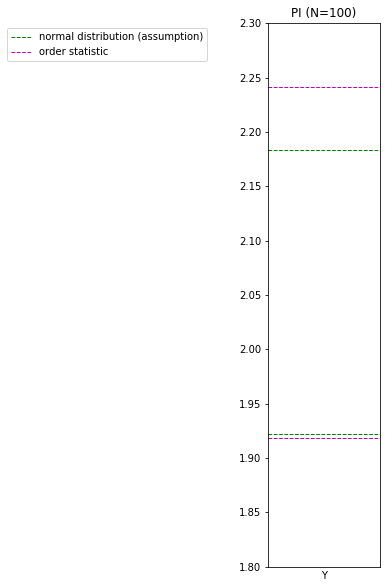

In [29]:
plot_PI(Y_N, 'q4_Y_100_prediction', legend=True)

Prediction interval assuming normal distribution: [1.91535,2.18399]
Width size: 0.26864
Prediction interval using ordered statistic: [1.91466,2.29093]
Width size: 0.37627


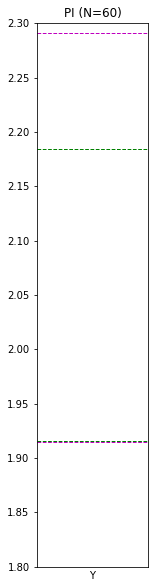

In [30]:
plot_PI(Y_N[:60], 'q4_Y_60_prediction')

Prediction interval assuming normal distribution: [1.90130,2.19577]
Width size: 0.29447
No valid prediction interval using the order statistic for N=30.


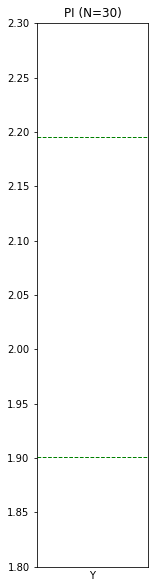

In [31]:
plot_PI(Y_N[:30], 'q4_Y_30_prediction')